In [1]:
from glob import glob
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("../../tools")
from plot_tools import plot_uv_map,plot_map_zoom
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
#filenames_drifters = sorted(glob('/work/ALT/swot/aval/wisa/data_challenge_ose/data/independent_drifters/uv_drifters_*.nc'))
filenames_drifters = sorted(glob('/Odyssey/private/t22picar/2023a_SSH_mapping_OSE/nb_diags_THEO/data/independent_drifters/uv_drifters_*.nc'))

In [4]:
time_min = '2019-01-01'                                        # time min for analysis
time_max = '2019-12-31'  
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='time')
ds_drifter = ds_drifter.where((ds_drifter.time >= np.datetime64(time_min)) & (ds_drifter.time <=  np.datetime64(time_max)), drop=True)
ds_drifter


<xarray.Dataset> Size: 69MB
Dimensions:    (time: 2156405)
Coordinates:
  * time       (time) datetime64[ns] 17MB 2019-01-01 ... 2019-12-31
    latitude   (time) float32 9MB dask.array<chunksize=(5559,), meta=np.ndarray>
    longitude  (time) float32 9MB dask.array<chunksize=(5559,), meta=np.ndarray>
Data variables:
    EWCT       (time) float32 9MB dask.array<chunksize=(5559,), meta=np.ndarray>
    NSCT       (time) float32 9MB dask.array<chunksize=(5559,), meta=np.ndarray>
    sensor_id  (time) float64 17MB dask.array<chunksize=(5559,), meta=np.ndarray>
Attributes: (12/46)
    data_type:                   OceanSITES trajectory data
    format_version:              2.0
    platform_code:               116275
    date_update:                 2020-10-13T12:17:40Z
    institution:                 AOML
    institution_edmo_code:       1799
    ...                          ...
    deployment_lat:              -58.44
    last_longitude_observation:  82.75
    last_latitude_observation:   -18.49
    date_drog_lost:              2017-01-21T03:37:00Z
    death_type:                  stop transmitting
    last_date_observation:       2019-01-16T01:51:00Z

In [7]:
# Grid map 
maps_glorys = xr.open_dataset("/Odyssey/private/t22picar/data/glorys_15m/glorys_multivar_15m_2010-2018.nc").sel(time="2010-01-01")

In [19]:
lon_bins = np.linspace(-180.125, 179.9 + 0.125, 1441)
lat_bins = np.linspace(-80.125, 90.125, 680)

In [21]:

# Supposons que les variables de longitude et latitude soient nommées 'longitude' et 'latitude'
longitude = ds_drifter['longitude'].values
latitude = ds_drifter['latitude'].values

# Calculer le nombre de données dans chaque bin 2D
histogram, lat_edges, lon_edges = np.histogram2d(
    latitude, longitude, bins=[lat_bins, lon_bins]
)

# Convertir le résultat en xarray.DataArray pour une manipulation plus facile
histogram_da = xr.DataArray(
    histogram,
    coords=[('lat_bin', lat_edges[:-1]), ('lon_bin', lon_edges[:-1])],
    dims=['lat_bin', 'lon_bin'])

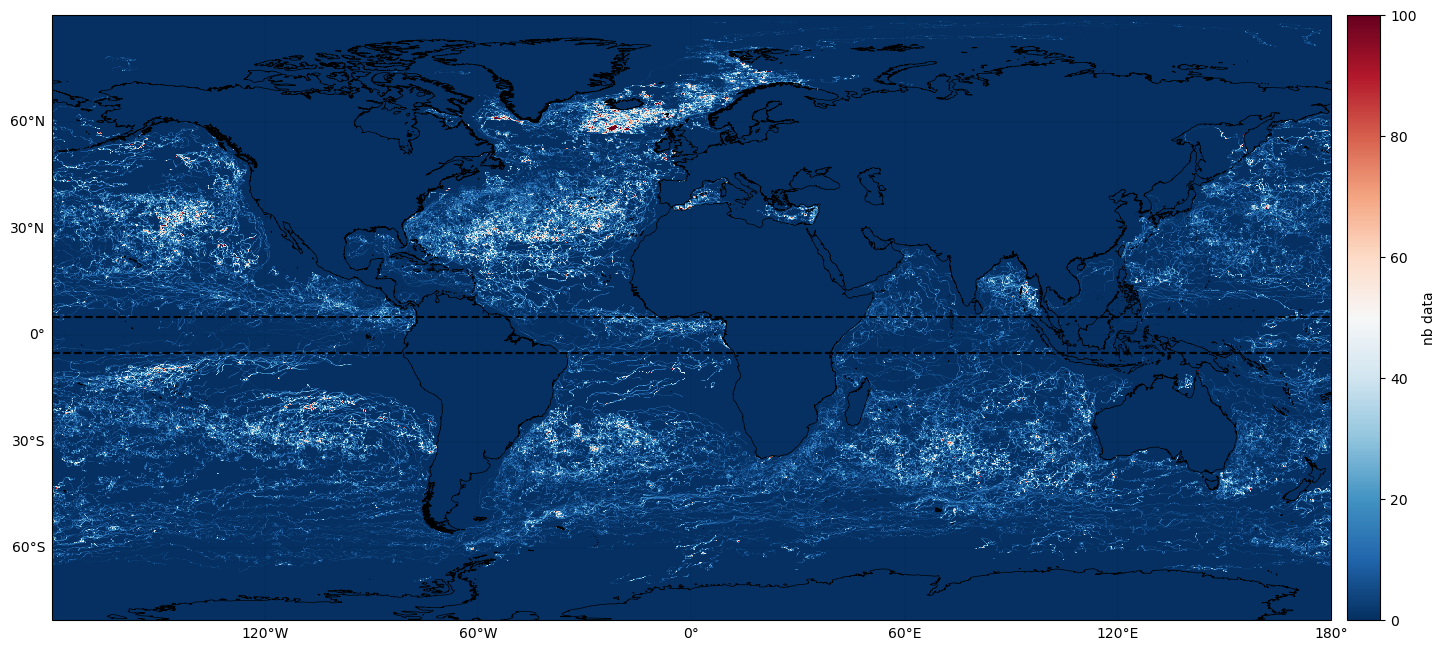

In [24]:
plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,colorbar_title="nb data")

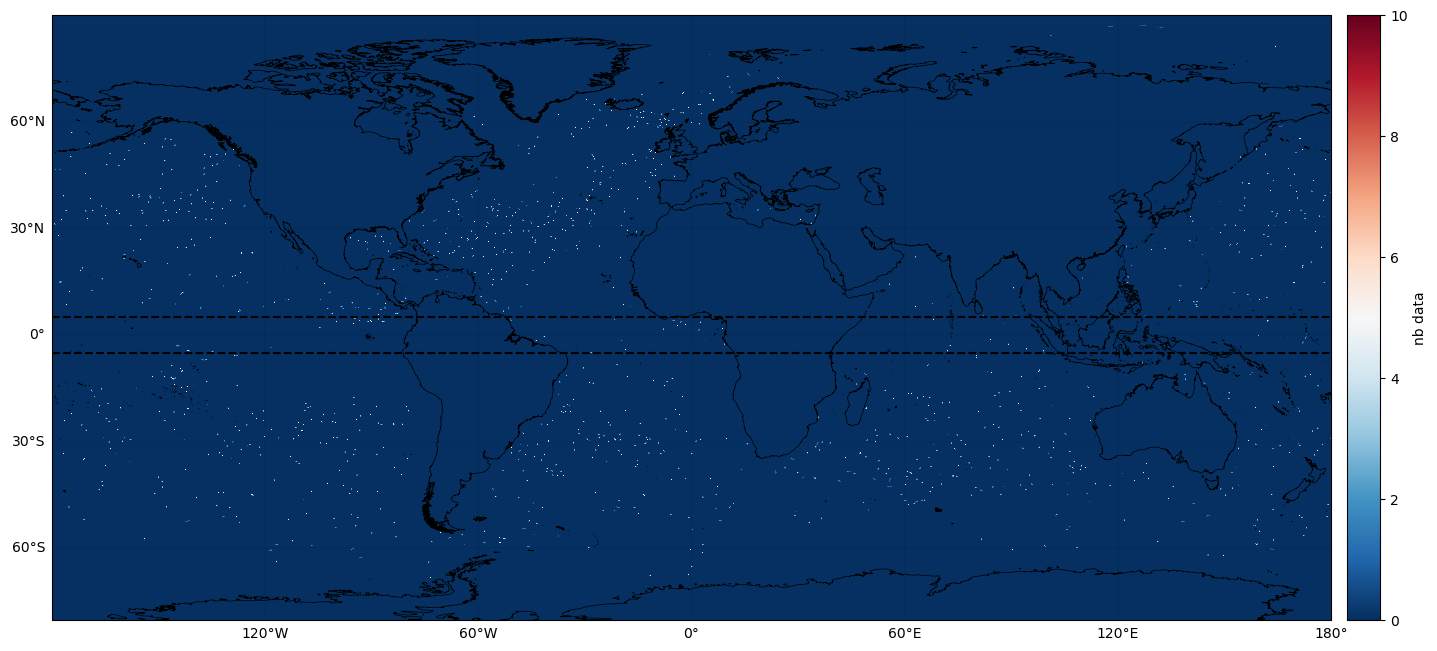

In [25]:
time_min = '2019-01-01'                                        # time min for analysis
time_max = '2019-01-02'  
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='time')
ds_drifter = ds_drifter.where((ds_drifter.time >= np.datetime64(time_min)) & (ds_drifter.time <=  np.datetime64(time_max)), drop=True)
ds_drifter


# Supposons que les variables de longitude et latitude soient nommées 'longitude' et 'latitude'
longitude = ds_drifter['longitude'].values
latitude = ds_drifter['latitude'].values

# Calculer le nombre de données dans chaque bin 2D
histogram, lat_edges, lon_edges = np.histogram2d(
    latitude, longitude, bins=[lat_bins, lon_bins]
)

# Convertir le résultat en xarray.DataArray pour une manipulation plus facile
histogram_da = xr.DataArray(
    histogram,
    coords=[('lat_bin', lat_edges[:-1]), ('lon_bin', lon_edges[:-1])],
    dims=['lat_bin', 'lon_bin'])

plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=np.max(histogram_da),colorbar_title="nb data")

In [10]:

fig, axs = plt.subplots(nrows=1,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11,7.5))



p0 = axs.pcolormesh(lon_bins, lat_bins, histogram_da, cmap='jet',vmax=3000)

axs.set_title('Number of data from drifter (2019)')

axs.coastlines(resolution='10m', lw=0.5)
# optional add grid lines
p0.axes.gridlines(color='black', alpha=0., linestyle='--')
# draw parallels/meridiens and write labels
gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=0.1, color='black', alpha=0.5, linestyle='--')
# adjust labels to taste
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}


cax = fig.add_axes([0.92, 0.37, 0.02, 0.25])
cbar = fig.colorbar(p0, cax=cax, orientation='vertical')
cax.set_ylabel('Number of data', fontweight='bold')



NameError: name 'ccrs' is not defined